In [1]:
from Predict_lc import PredictLightCurve

In [2]:
import numpy as np
from dataframe import Data
from io_utils import *
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
import pandas as pd

In [12]:
dataset = "ZTF"
train_ob = load_ztf_train_data()
test_ob = load_ztf_test_data()

train_object_ids = train_ob.get_all_object_ids()
train_kilonova_ids = train_ob.get_ids_of_event_type(150)
train_kilonova_ids = vstack([train_kilonova_ids, train_ob.get_ids_of_event_type(151)])
train_kilonova_ids = train_kilonova_ids['SNID']
train_ob.df_data.sort(['SNID','MJD'])
train_ob.df_metadata.sort(['SNID'])

test_object_ids = test_ob.get_all_object_ids()
test_kilonova_ids = test_ob.get_ids_of_event_type(150)
test_kilonova_ids = vstack([test_kilonova_ids, test_ob.get_ids_of_event_type(151)])
test_kilonova_ids = test_kilonova_ids['SNID']
test_ob.df_data.sort(['SNID','MJD'])
test_ob.df_metadata.sort(['SNID'])

bands = ['g', 'r']
color_band_dict = {'g':'C2', 'r':'C3'}

In [46]:
def create_features_df(data_ob, decouple_prediction_bands=True, decouple_pc_bands=False, mark_maximum=False, min_flux_threshold=20, num_pc_components=3, use_random_current_date= False, plot_prediction = False):
    data_dict = {data_ob.object_id_col_name:[],
                'y':[] ,}
    
    data_object_ids = data_ob.get_all_object_ids()
    #data_object_ids = np.random.permutation(data_object_ids)
    data_kilonova_ids = data_ob.get_ids_of_event_type(150)
    data_kilonova_ids = vstack([data_kilonova_ids, data_ob.get_ids_of_event_type(151)])
    data_kilonova_ids = data_kilonova_ids['SNID']
    data_ob.df_data.sort(['SNID','MJD'])
    for object_id in data_object_ids:
        event_df = data_ob.get_data_of_event(object_id)
        #print(event_df['FLT'])
        pc = PredictLightCurve(data_ob, object_id=object_id)
        #print(pc.lc.df['FLT'])
        #print(pc.lc.band_map.items())
        #print("------------")
        current_date = None
        if use_random_current_date:
            median_date = np.median(pc.lc.dates_of_maximum)
            current_date = median_date+random()*50-25
        coeff_dict, num_pts_dict = pc.predict_lc_coeff(current_date=current_date,num_pc_components=num_pc_components, decouple_pc_bands=decouple_pc_bands, decouple_prediction_bands=decouple_prediction_bands, min_flux_threshold=min_flux_threshold, bands=bands)
        data_dict[data_ob.object_id_col_name].append(object_id)
        #print(data_dict['object_id'])
        for i,band in enumerate(bands):
            for j in range(1,num_pc_components+1):
                col_name = str(i)+'pc'+str(j)
                if col_name not in data_dict.keys():
                    data_dict[col_name] = []
                data_dict[col_name].append(coeff_dict[band][j-1])
            col_name = str(i)+'n'
            if col_name not in data_dict.keys():
                    data_dict[col_name] = []
            data_dict[col_name].append(num_pts_dict[band])
        if object_id in data_kilonova_ids:
            data_dict['y'].append(1)
        else:
            data_dict['y'].append(0)
        if plot_prediction:
            fig = pc.plot_predicted_bands(all_band_coeff_dict=coeff_dict, color_band_dict=color_band_dict, mark_maximum=mark_maximum,axes_lims = False)
            plt.show()
            plt.close('all')

    data_df = pd.DataFrame(data_dict)
    data_df = data_df.sample(frac=1).reset_index(drop=True)
    return data_df
        

In [47]:
train_df = create_features_df(train_ob)
test_df = create_features_df(test_ob)

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/p

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/p

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/p

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/p

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/biswajit/anaconda3/envs/fink/lib/p

In [48]:
print(test_df)

      0n         0pc1         0pc2         0pc3  1n          1pc1  \
0     21  2178.991403  -776.332349   450.919366  25   4404.054923   
1     18   283.205331   -73.159181   309.577374  24   1760.835751   
2     12   161.682699  -261.578931   -87.395834  10    152.620911   
3     23   778.660537   -44.390485  -357.307153  19    857.731645   
4     24   593.213873  -203.407158  -386.208209  21   1820.626177   
...   ..          ...          ...          ...  ..           ...   
5495  24  4050.906495  -960.256618   856.816432  21   3765.467819   
5496  12  6342.417803   176.744825 -3170.420813  11  15541.598273   
5497  14   970.903222  -677.218171  -328.083999  15   2035.573570   
5498  12  9884.970497 -1498.062740  1281.336140  10  26535.785273   
5499  10   761.453629  -451.984331  -241.456295   9   2392.989888   

             1pc2         1pc3       SNID  y  
0    -1242.357397  1349.947259   88246865  0  
1     -368.900192  -518.670749   82615159  0  
2     -443.923428  -111.912506

In [49]:
train_df.to_csv('/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_features.csv', index=False)
test_df.to_csv('/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_features.csv', index=False)

# Load saved data

In [17]:
train_df = pd.read_csv('/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/train_features.csv')
test_df = pd.read_csv('/media/biswajit/drive/Kilonova_datasets/ZTF_20190512/test_features.csv')

In [18]:
print(train_df)

      0n         0pc1        0pc2        0pc3  1n         1pc1         1pc2  \
0     20   304.228918   -8.787106 -165.162094  19   168.743366  -229.345166   
1     12   602.789887 -186.837756 -221.134997  18   379.372449    12.144352   
2     15  2101.424561 -612.697277  -56.165621  19  1659.201305 -1480.555030   
3     18   657.561573 -393.537890 -330.070898  16   630.401969  -172.729358   
4     20  1658.441809 -337.244936  267.808194   7  3450.247191  -800.581636   
...   ..          ...         ...         ...  ..          ...          ...   
3995  23  1364.968816 -386.410257  134.848501  10   787.186065  -590.089747   
3996  22  1208.142299 -115.682647 -273.107693  20  1935.502185  -580.032532   
3997  21   317.013036 -375.943377  -19.611741  17  1164.475573   -19.524673   
3998  21   875.682661 -344.359912  234.039122  15   782.520709  -302.139148   
3999  20  2665.795221 -817.398647 -915.418076  22  2965.438951 -2005.796841   

             1pc3       SNID  y  
0     -106.376610

In [19]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

# Train classifier

In [20]:
num_pc_components = 3

cols = []
for i,band in enumerate(bands):
    for j in range(1,num_pc_components+1):
        col_name = str(i)+'pc'+str(j)
        cols.append(col_name)
        
x_train = train_df[cols].values
y_train = train_df['y'].values

x_test = test_df[cols].values
y_test = test_df['y'].values

In [21]:
print(y_test)

[0 0 1 ... 0 0 0]


In [22]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_score= clf.predict_proba(x_test)

In [38]:
true_index = y_test ==1
y_test_true = y_test[true_index]
y_pred_true = y_pred[true_index]
print(np.sum(y_test_true))
print(np.sum(y_pred_true))

1000
740


In [24]:
print(y_score[:,1])

[0.   0.23 0.71 ... 0.02 0.   0.01]


In [25]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9050909090909091


In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])
roc_auc = metrics.auc(fpr, tpr)

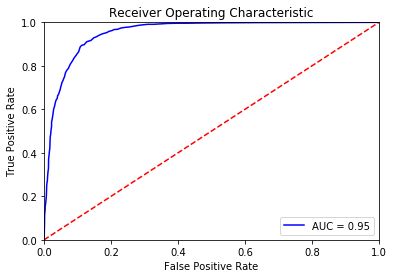

In [27]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
print(metrics.confusion_matrix(y_test, y_pred))

[[4238  262]
 [ 260  740]]


In [62]:
matrx[1]

array([260, 740])

In [71]:
prediction_stat={}
for i,object_id in enumerate(test_df['SNID']):
    #print(i)
    type_no = test_ob.get_object_type_number(object_id)
    print(type_no)
    if ((type_no==151)|(type_no==150))&(y_pred[i] ==1):
        if type_no not in prediction_stat:
            prediction_stat[type_no]=1
        else:
            prediction_stat[type_no]=prediction_stat[type_no]+1

    elif (y_pred[i]==1)&(type_no!=151)&(type_no!=150):
        #print(9)
        if type_no not in prediction_stat:
            prediction_stat[type_no]=1
        else:
            prediction_stat[type_no]=prediction_stat[type_no]+1

162
141
151
102
141
164
145
113
114
160
141
162
151
151
112
160
101
103
160
150
102
151
150
150
163
164
164
164
141
145
145
151
141
101
161
164
151
101
150
160
113
101
145
114
163
160
170
162
112
150
151
164
163
151
101
150
113
114
141
151
151
151
143
163
162
151
102
143
113
150
145
143
143
101
112
151
101
150
162
162
151
112
163
143
145
114
101
102
145
141
101
103
113
150
150
113
114
145
161
114
101
112
163
113
160
151
164
163
162
161
113
150
160
163
112
150
141
151
160
143
103
150
143
162
113
113
145
150
112
160
151
160
141
112
170
160
150
163
112
150
113
161
101
102
141
150
151
114
162
164
150
151
112
150
113
150
151
113
101
114
112
143
151
103
151
161
150
141
102
151
150
150
161
143
170
101
164
103
161
113
150
112
145
164
162
102
150
164
161
141
143
112
145
161
160
114
170
160
114
170
143
101
151
102
151
112
143
164
164
102
103
162
101
163
162
150
141
150
113
112
150
164
161
151
151
143
151
112
161
143
103
113
160
150
161
163
163
162
145
150
143
102
150
150
160
150
103
150
163
113


163
163
113
170
114
102
164
101
163
145
160
163
101
170
112
145
170
162
170
141
163
101
141
101
150
113
150
162
164
113
114
141
161
151
143
103
164
103
161
101
161
162
101
151
103
112
101
114
114
161
113
145
150
161
161
114
163
150
161
164
170
151
162
145
164
160
114
102
150
102
160
113
103
141
102
161
161
103
102
160
112
141
113
112
162
160
113
160
143
150
162
163
114
143
143
102
163
160
114
162
151
151
150
170
102
150
143
103
145
150
145
114
150
150
150
151
141
101
112
160
162
170
151
160
102
170
161
160
150
163
150
143
160
150
160
141
164
161
150
170
151
151
150
103
145
102
114
101
101
102
103
141
101
164
145
161
143
150
170
143
150
161
150
164
114
113
141
162
151
161
114
161
113
162
103
151
113
113
161
103
150
113
163
145
151
114
151
151
113
101
145
150
163
163
113
151
170
150
101
164
170
170
103
151
112
102
114
112
141
103
160
164
151
103
151
151
162
161
113
145
145
101
150
103
151
160
103
145
141
101
162
141
102
163
151
151
151
114
161
163
112
163
162
150
112
112
161
162
150
143


151
151
150
151
161
114
163
170
162
151
145
162
102
102
150
141
151
161
141
151
103
102
113
162
151
143
160
103
163
103
102
145
150
143
143
145
151
160
163
103
114
101
141
151
145
114
112
102
170
150
150
161
112
151
112
112
163
151
101
170
161
141
170
150
164
161
150
164
161
150
161
103
162
145
141
150
101
150
113
143
112
151
164
160
141
160
162
141
141
162
164
151
170
170
151
103
161
162


In [72]:
prediction_stat

{101: 3,
 102: 1,
 103: 12,
 112: 4,
 113: 18,
 114: 8,
 141: 58,
 143: 8,
 145: 128,
 150: 381,
 151: 359,
 160: 1,
 161: 2,
 162: 1,
 163: 9,
 164: 3,
 170: 6}